In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
import warnings

# Ignorar advertencias específicas
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Cargar los datos
clientes = pd.read_csv(r"C:\Users\esetx\TheBridge_DSPT\TheBridge_Machine\Proyecto machine learning\data\raw\online_shoppers_intention.csv")

# Preprocesamiento de datos
meses_dict = {"Feb": 1, "Mar": 2, "May": 3, "June": 4, "Jul": 5, "Aug": 6, "Sep": 7, "Oct": 8, "Nov": 9, "Dec": 10}
clientes["Mes_Num"] = clientes["Month"].map(meses_dict)
clientes.drop(columns=['Month'], inplace=True)
clientes['Weekend'] = clientes['Weekend'].astype(int)
clientes['Revenue'] = clientes['Revenue'].astype(int)
clientes_new = pd.get_dummies(clientes, columns=['VisitorType'], dtype=int)

In [15]:

clientes.describe(include='all')

# Tipos de los datos
clientes.dtypes

# Tipos de los datos y missings
clientes.info()

# Columnas del dataset
clientes.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Mes_Num'],
      dtype='object')

In [3]:
# Seleccionar características relevantes
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
X = clientes_new[features]
y = clientes_new['Revenue']

In [18]:
# Estadísticos
clientes.describe(include= 'all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Mes_Num
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returning_Visitor,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10551,NaN,NaN,NaN
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,NaN,0.232603,0.154745,5.821573
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,NaN,0.422509,0.361676,3.169291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,NaN,0.000000,0.000000,3.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,NaN,0.000000,0.000000,5.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,NaN,0.000000,0.000000,9.000000


In [4]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [16]:
print(clientes['VisitorType'].value_counts())

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


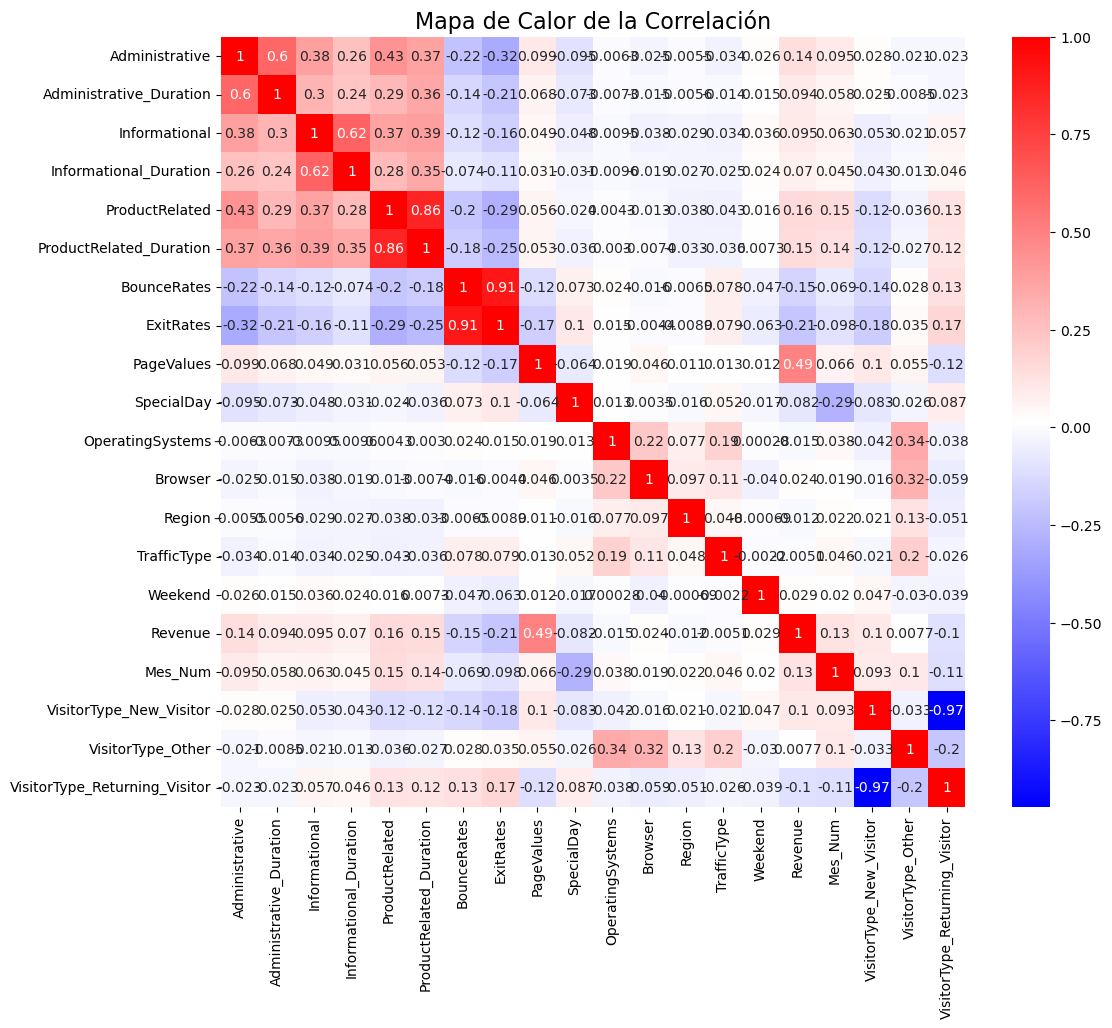

In [17]:
import matplotlib.pyplot as plt

import seaborn as sns

correlation_matrix = clientes_new.corr()

# %%
# Mediante un mapa de calor vamos a ver mejor como son estas correlaciones

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr')
plt.title('Mapa de Calor de la Correlación', fontsize=16)
plt.show()

Al analizar la matriz de correlación que compartiste, aquí están los **insights más relevantes** que se pueden extraer:

### 1. **Correlaciones Fuertes y Directas:**
   - **`ProductRelated` y `ProductRelated_Duration` (0.85):**
     - Hay una **fuerte correlación positiva** entre el número de páginas relacionadas con productos visitadas y el tiempo total dedicado a esas páginas. Esto es esperado, ya que a mayor número de páginas vistas, más tiempo se pasa en ellas.
  
   - **`BounceRates` y `ExitRates` (0.91):**
     - La **alta correlación positiva** sugiere que las tasas de rebote y de salida están fuertemente relacionadas, lo cual tiene sentido porque los usuarios que rebotan probablemente estén incluidos en la tasa de salida.

### 2. **Correlaciones Moderadas con `Revenue` (Variable Objetivo):**
   - **`PageValues` y `Revenue` (0.49):**
     - Existe una correlación positiva moderada entre `PageValues` (valor de las páginas visitadas) y la variable `Revenue` (que indica si hubo una transacción). Esto sugiere que las páginas con un valor mayor (quizás en términos de productos más caros o con más contenido) están relacionadas con una mayor probabilidad de conversión.

   - **`ExitRates` y `Revenue` (-0.21):**
     - Hay una **correlación negativa moderada** entre las tasas de salida y la generación de ingresos. Esto sugiere que los usuarios que no salen del sitio inmediatamente (es decir, con menores `ExitRates`) tienen más probabilidades de realizar una compra.

   - **`BounceRates` y `Revenue` (-0.15):**
     - La **correlación negativa** entre la tasa de rebote y `Revenue` indica que los usuarios que rebotan (salen sin interactuar mucho) tienden a no generar ingresos.

### 3. **Correlaciones Interesantes con `Weekend`:**
   - **`Revenue` y `Weekend` (0.029):**
     - Aunque la correlación es muy baja, hay una leve tendencia a que más transacciones ocurren durante el fin de semana (`Weekend`).

### 4. **Correlaciones entre Variables Categóricas de Tipo de Visitante:**
   - **`VisitorType_New_Visitor` y `VisitorType_Returning_Visitor` (-0.97):**
     - La correlación negativa cercana a -1 entre `New_Visitor` y `Returning_Visitor` es esperada, ya que estas son categorías mutuamente excluyentes. Es decir, si un visitante es nuevo, no puede ser recurrente, y viceversa.

   - **`VisitorType_Returning_Visitor` y `Revenue` (0.13):**
     - Los visitantes recurrentes muestran una correlación positiva con `Revenue`, lo cual sugiere que los visitantes que regresan tienen más probabilidad de generar ingresos en comparación con los nuevos visitantes.

### 5. **Otras Observaciones:**
   - **`Administrative` y `Administrative_Duration` (0.6):**
     - Existe una correlación positiva entre el número de páginas administrativas visitadas y el tiempo dedicado a estas páginas, aunque no tan fuerte como en el caso de `ProductRelated`.

   - **`Informational` y `Informational_Duration` (0.62):**
     - Al igual que las variables administrativas, las páginas informativas y el tiempo dedicado a ellas tienen una correlación moderada, lo que es lógico.

### Conclusiones:

- **Impacto del Comportamiento del Usuario en `Revenue`:** Las tasas de rebote y salida juegan un rol importante en la probabilidad de conversión. Los usuarios que ven más páginas de productos o que navegan en páginas con valores altos (como de productos caros) tienen más probabilidad de realizar una compra.
  
- **Relevancia de los Visitantes Recurrentes:** Los visitantes que regresan al sitio parecen estar más dispuestos a comprar, lo que podría sugerir que enfocarse en la retención de clientes puede ser una estrategia efectiva para aumentar los ingresos.

- **Fin de Semana y Ventas:** Aunque no es una correlación fuerte, hay una ligera tendencia a que más compras ocurren durante los fines de semana, lo que podría ser útil para planificar campañas de marketing.

Estos insights pueden ayudarte a dirigir estrategias de optimización de conversión y segmentación en tu análisis de clustering y modelos de clasificación.

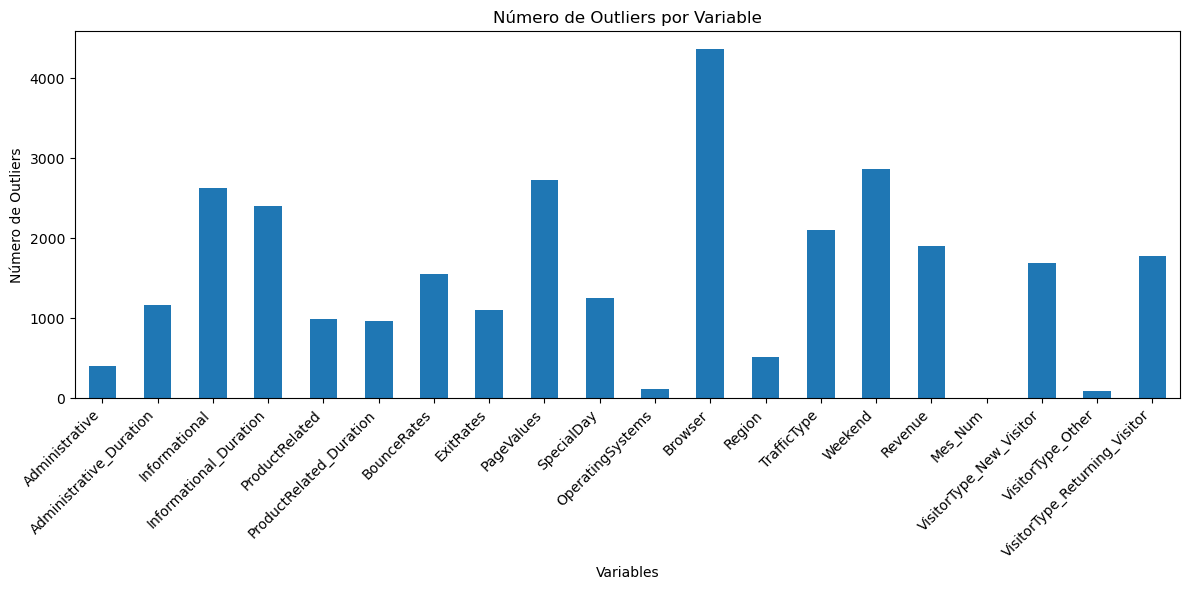

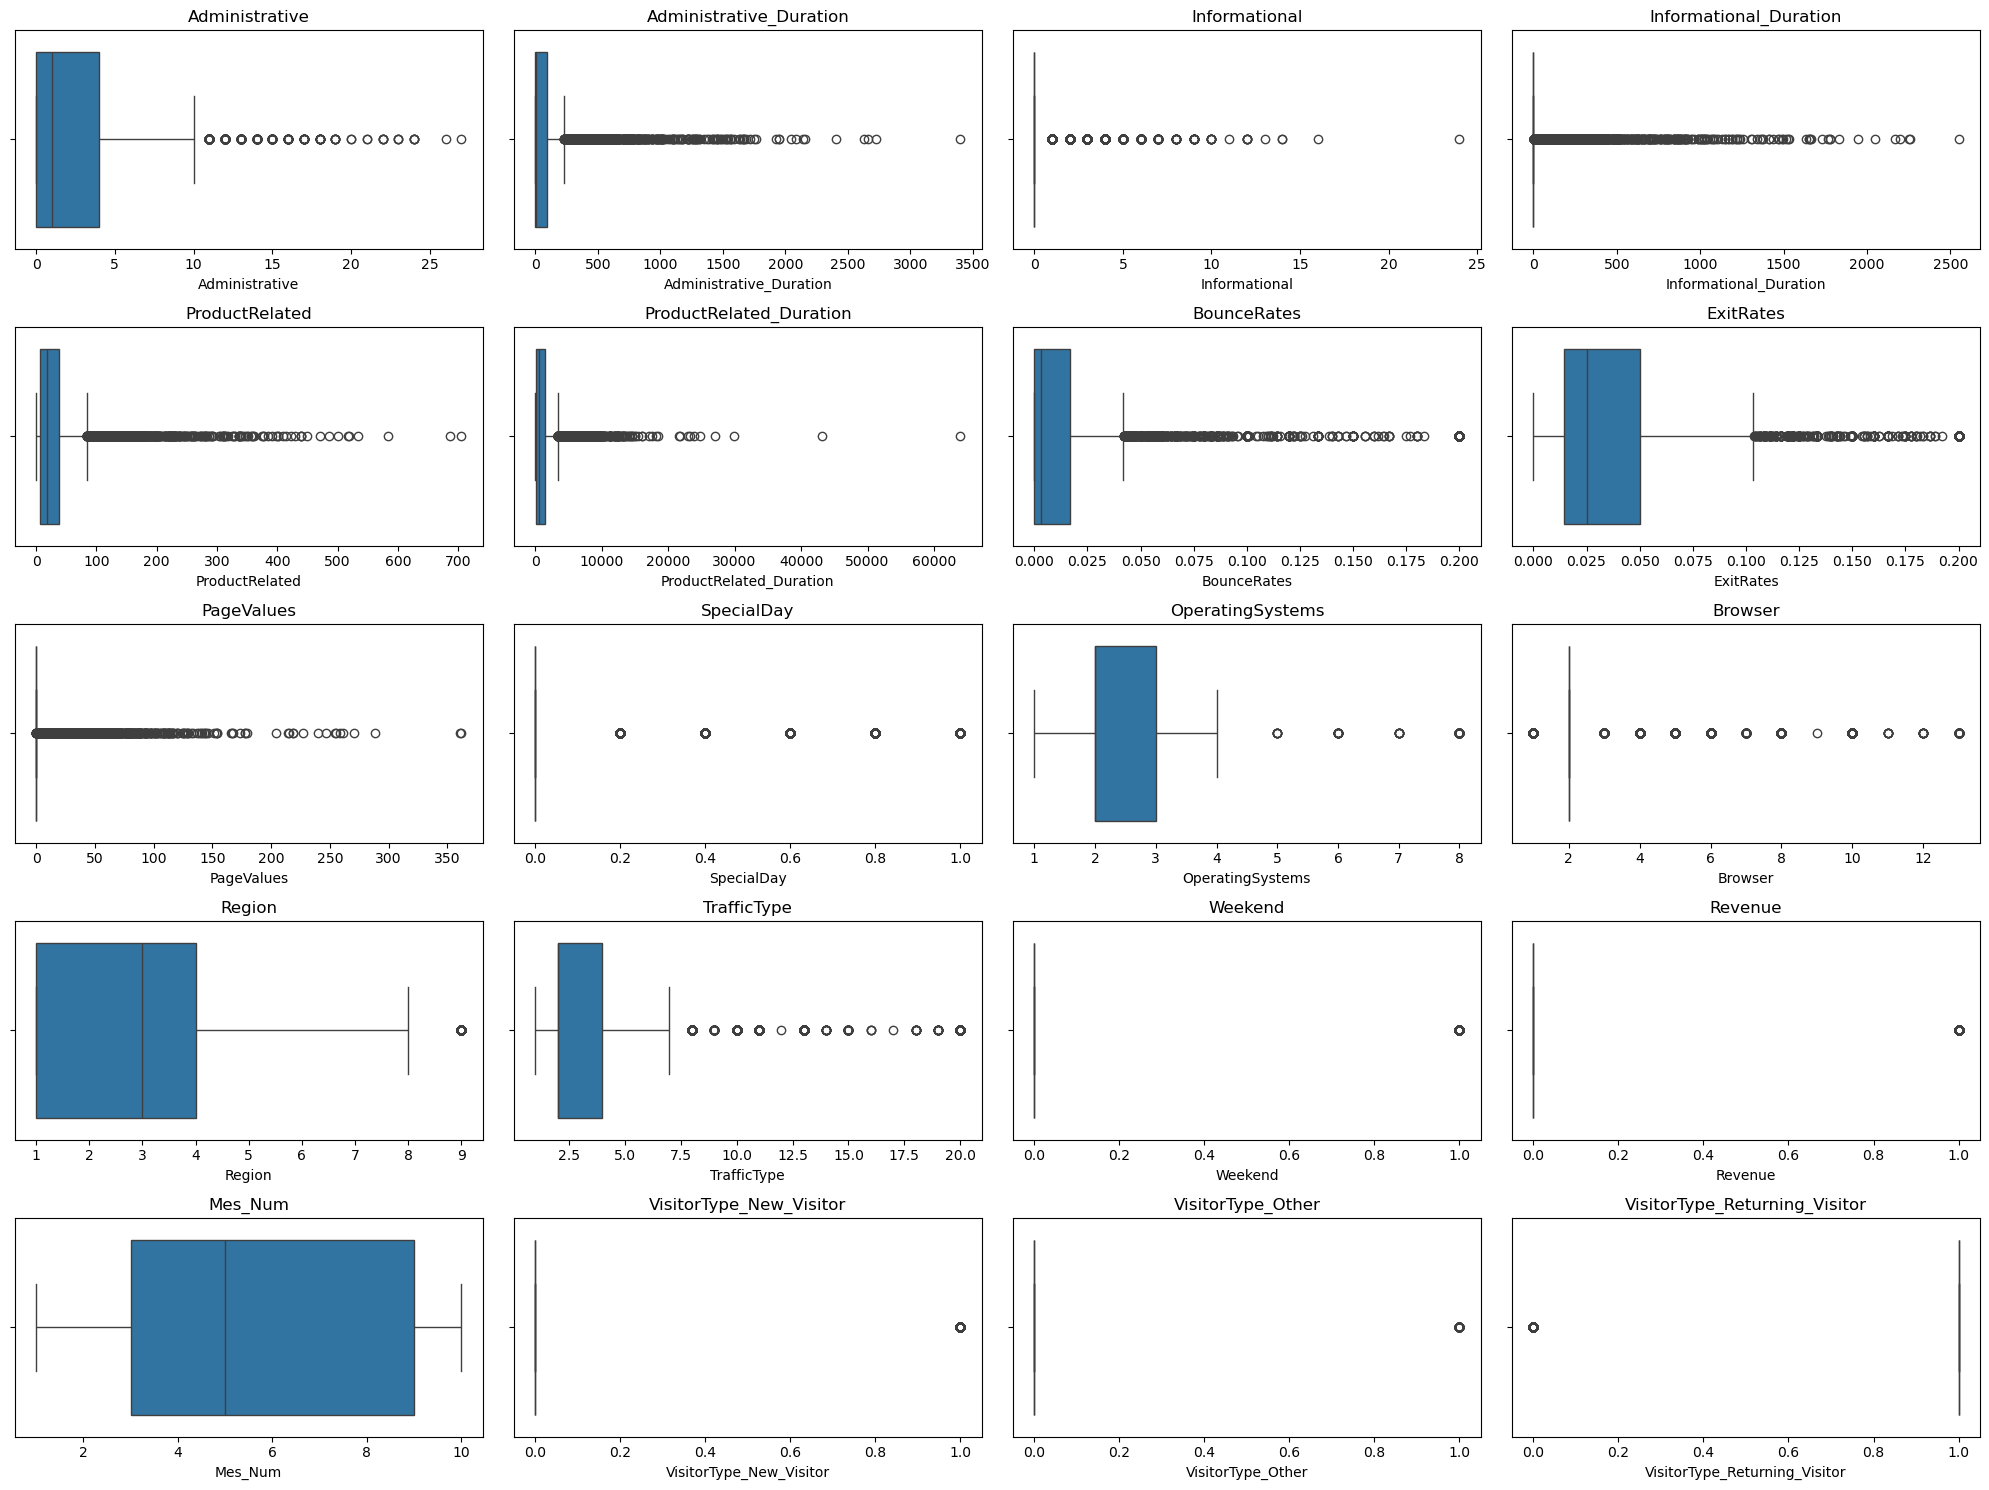

Porcentaje de outliers por variable:
Browser                          35.433901
Weekend                          23.260341
PageValues                       22.141119
Informational                    21.338200
Informational_Duration           19.505272
TrafficType                      17.039740
Revenue                          15.474453
VisitorType_Returning_Visitor    14.428224
VisitorType_New_Visitor          13.738848
BounceRates                      12.579075
SpecialDay                       10.145985
Administrative_Duration           9.505272
ExitRates                         8.913220
ProductRelated                    8.004866
ProductRelated_Duration           7.793998
Region                            4.144363
Administrative                    3.276561
OperatingSystems                  0.900243
VisitorType_Other                 0.689376
Mes_Num                           0.000000
dtype: float64


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame se llama 'df'
# Selecciona solo las columnas numéricas
numeric_columns = clientes_new.select_dtypes(include=[np.number]).columns

# Función para calcular outliers usando el método IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Calcula el número de outliers para cada variable
outliers_count = clientes_new[numeric_columns].apply(find_outliers_iqr)

# Visualiza el número de outliers por variable
plt.figure(figsize=(12, 6))
outliers_count.plot(kind='bar')
plt.title('Número de Outliers por Variable')
plt.xlabel('Variables')
plt.ylabel('Número de Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Crea box plots para visualizar la distribución y outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=clientes_new[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Imprime el porcentaje de outliers por variable
total_rows = len(clientes_new)
outliers_percentage = (outliers_count / total_rows) * 100
print("Porcentaje de outliers por variable:")
print(outliers_percentage.sort_values(ascending=False))

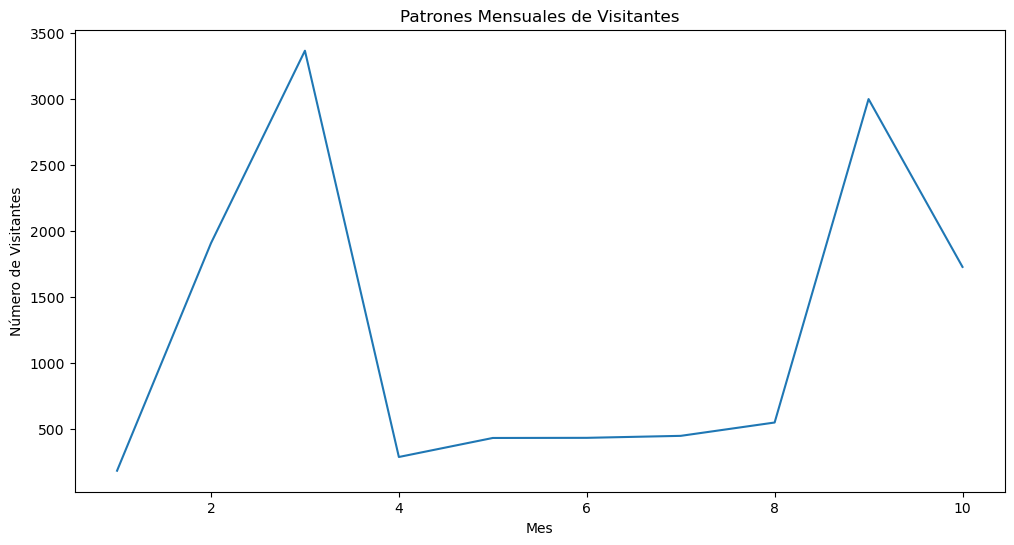

In [19]:
# Agrupar por mes y contar visitantes
monthly_visitors = clientes_new.groupby('Mes_Num')['Administrative'].count()

# Crear gráfico de líneas
monthly_visitors.plot(kind='line', figsize=(12, 6))
plt.title('Patrones Mensuales de Visitantes')
plt.xlabel('Mes')
plt.ylabel('Número de Visitantes')
plt.show()

In [5]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [7]:
# Función para evaluar y mostrar resultados
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

In [8]:
# Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

Random Forest Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2062
           1       0.90      0.93      0.92      2107

    accuracy                           0.91      4169
   macro avg       0.92      0.91      0.91      4169
weighted avg       0.92      0.91      0.91      4169



In [9]:
# LightGBM
lgbm = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test, "LightGBM")

[LightGBM] [Info] Number of positive: 8315, number of negative: 8360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 16675, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2062
           1       0.90      0.91      0.90      2107

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169



In [10]:
# XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

XGBoost Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2062
           1       0.91      0.92      0.92      2107

    accuracy                           0.92      4169
   macro avg       0.92      0.92      0.92      4169
weighted avg       0.92      0.92      0.92      4169



In [11]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('lgbm', lgbm),
    ('xgb', xgb_model)
], voting='soft')
voting_clf.fit(X_train, y_train)
evaluate_model(voting_clf, X_test, y_test, "Voting Classifier")

[LightGBM] [Info] Number of positive: 8315, number of negative: 8360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 16675, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Voting Classifier Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2062
           1       0.91      0.93      0.92      2107

    accuracy                           0.91      4169
   macro avg       0.91      0.91      0.91      4169
weighted avg       0.91      0.91      0.91      4169



In [12]:
# Análisis de características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportancia de características:")
print(feature_importance)


Importancia de características:
                   feature  importance
8               PageValues    0.468422
7                ExitRates    0.124300
5  ProductRelated_Duration    0.096347
4           ProductRelated    0.093682
6              BounceRates    0.065247
0           Administrative    0.060803
1  Administrative_Duration    0.053358
3   Informational_Duration    0.021845
2            Informational    0.015996


In [13]:


# Comparación de medias entre compradores y no compradores
buyers = clientes_new[clientes_new['Revenue'] == 1]
non_buyers = clientes_new[clientes_new['Revenue'] == 0]

mean_comparison = pd.DataFrame({
    'buyers_mean': buyers[features].mean(),
    'non_buyers_mean': non_buyers[features].mean()
})
mean_comparison['difference'] = mean_comparison['buyers_mean'] - mean_comparison['non_buyers_mean']
mean_comparison = mean_comparison.sort_values('difference', ascending=False)

print("\nComparación de medias entre compradores y no compradores:")
print(mean_comparison)


Comparación de medias entre compradores y no compradores:
                         buyers_mean  non_buyers_mean  difference
ProductRelated_Duration  1876.209615      1069.987809  806.221806
Administrative_Duration   119.483244        73.740111   45.743133
Informational_Duration     57.611427        30.236237   27.375189
PageValues                 27.264518         1.975998   25.288520
ProductRelated             48.210168        28.714642   19.495526
Administrative              3.393606         2.117732    1.275874
Informational               0.786164         0.451833    0.334331
BounceRates                 0.005117         0.025317   -0.020200
ExitRates                   0.019555         0.047378   -0.027823


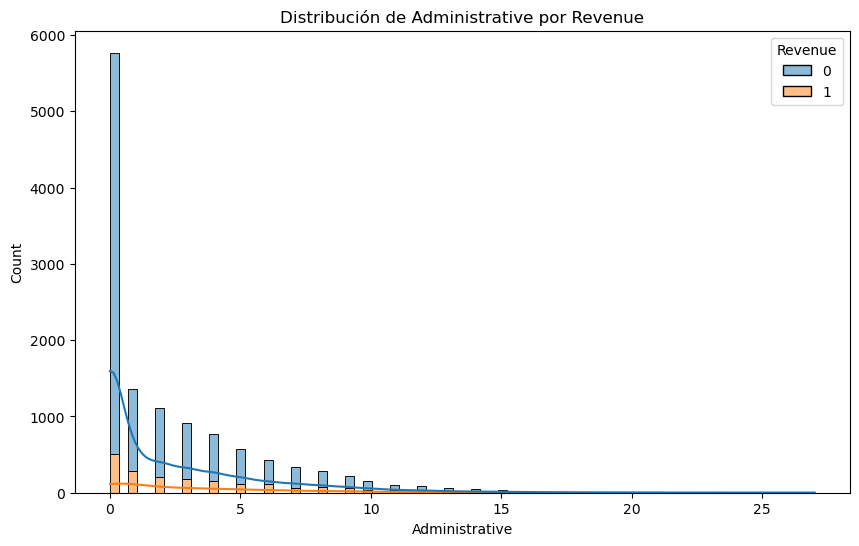

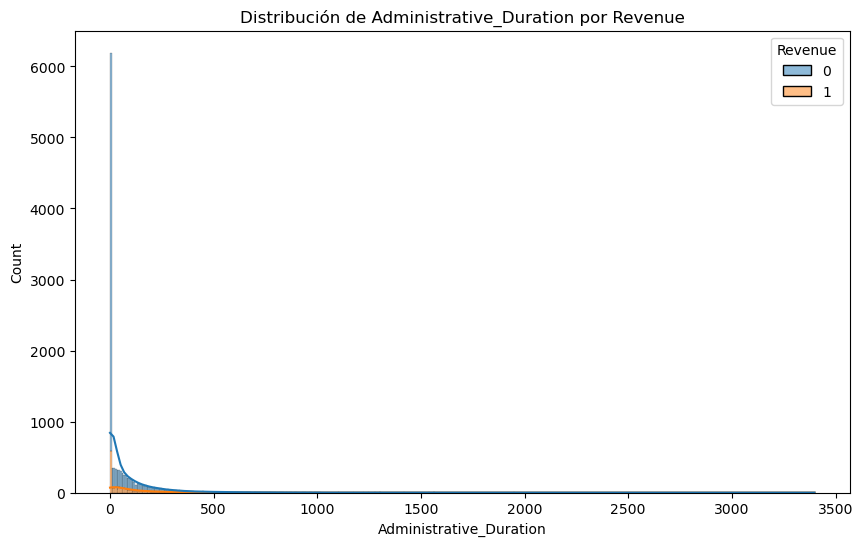

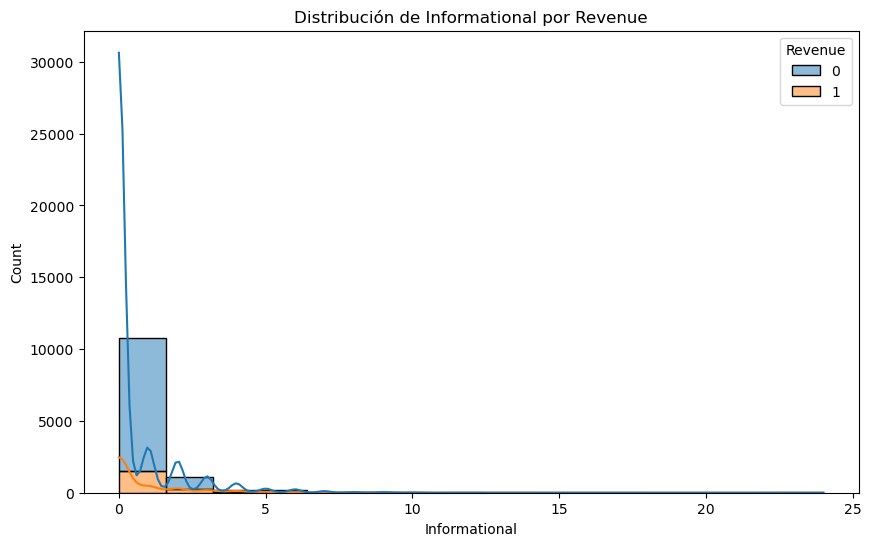

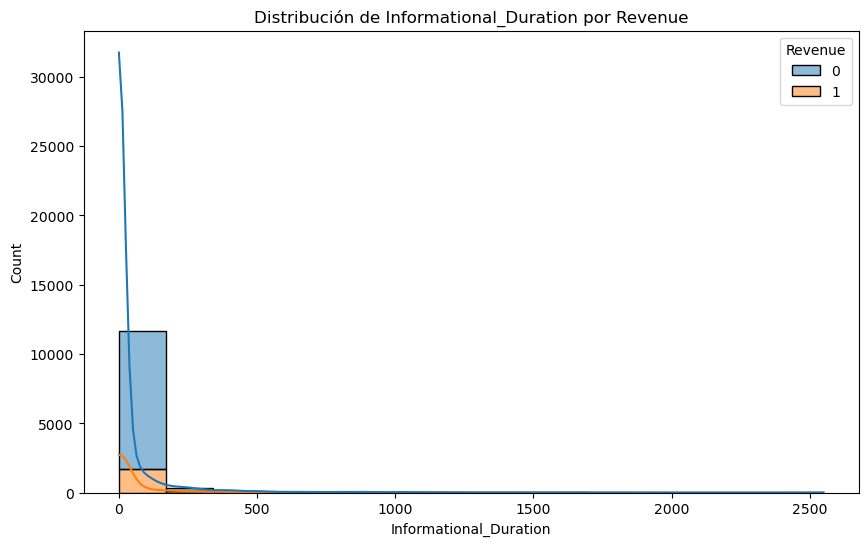

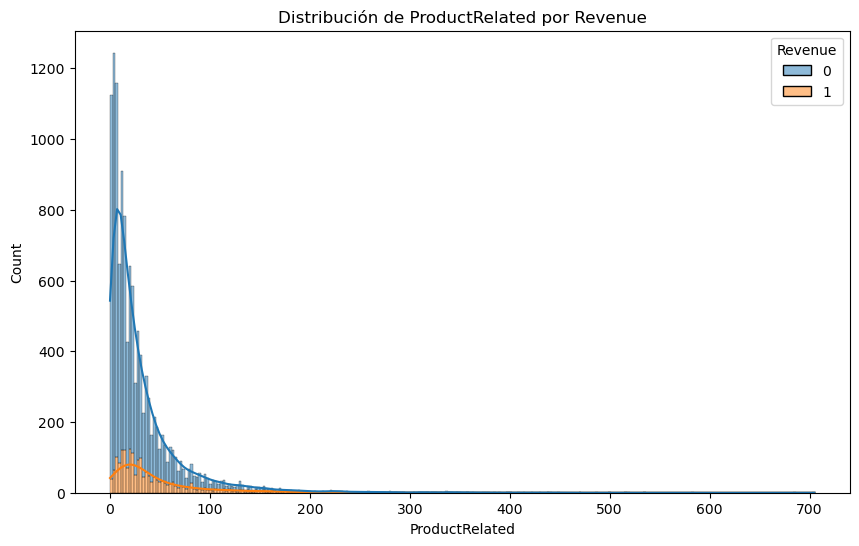

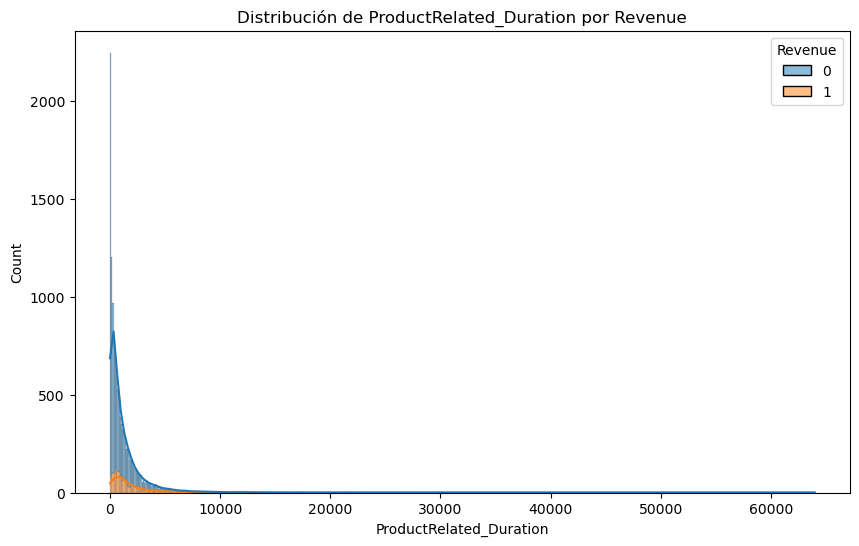

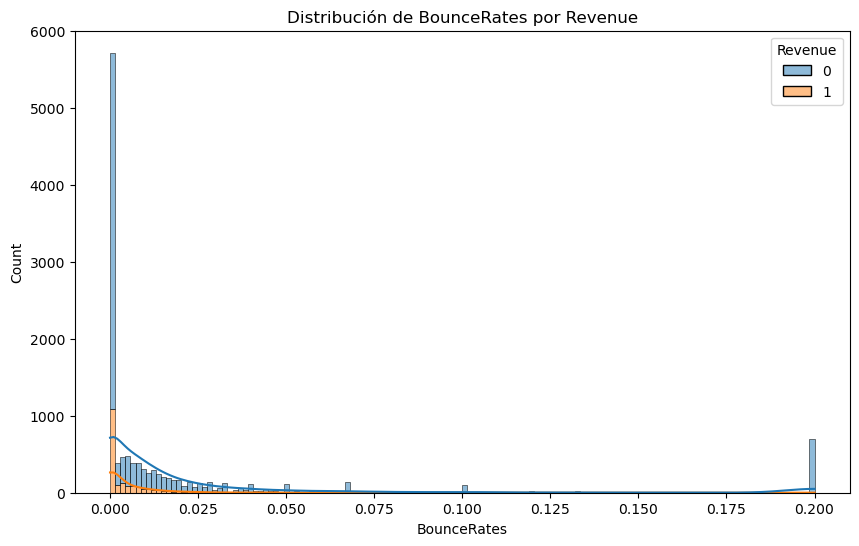

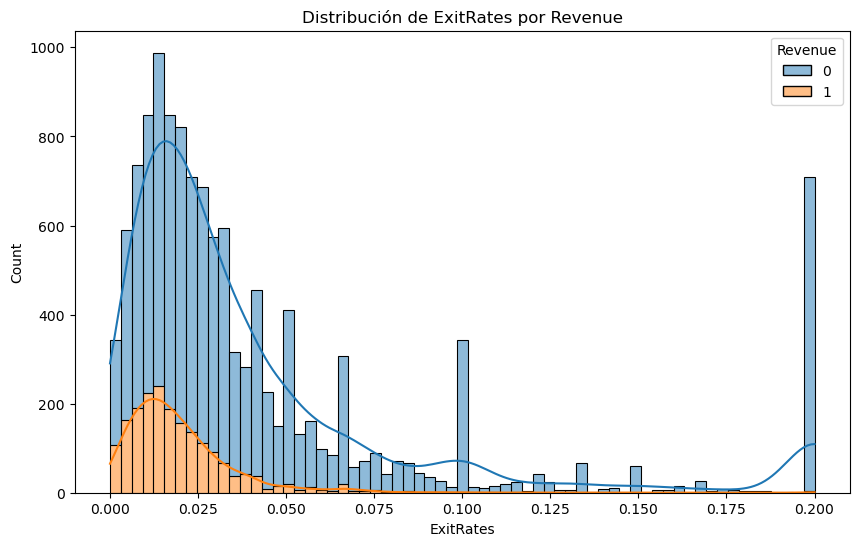

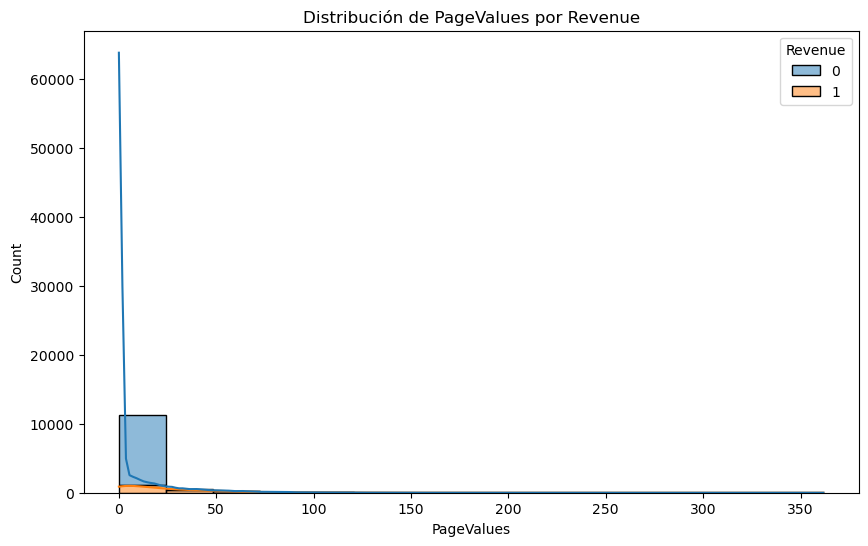

In [14]:
# Visualización de distribuciones
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=clientes_new, x=feature, hue='Revenue', kde=True, multiple="stack")
    plt.title(f'Distribución de {feature} por Revenue')
    plt.show()


In [22]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

# Predicciones para el cálculo de métricas
y_pred_rf = rf.predict(X_test)

# Cálculo de métricas adicionales
roc_auc = roc_auc_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


ROC-AUC Score: 0.91
Precision: 0.90
Recall: 0.93


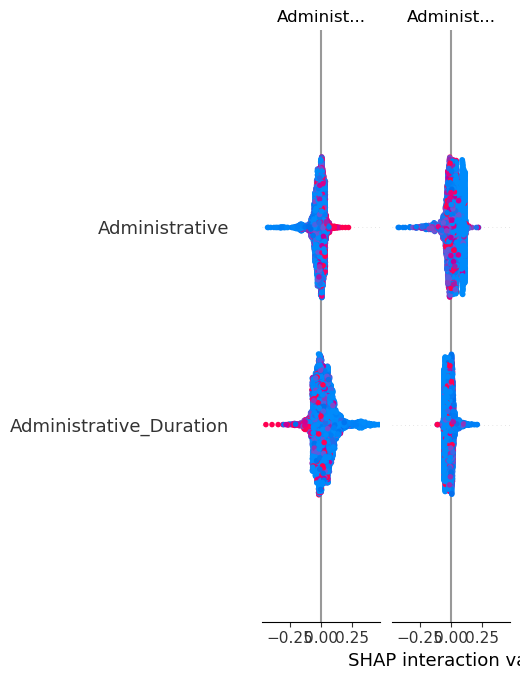

IndexError: index 8 is out of bounds for axis 1 with size 2

In [23]:
import shap

# Crear un objeto SHAP para interpretación
explainer = shap.TreeExplainer(rf)

# Obtener los valores SHAP
shap_values = explainer.shap_values(X_test)

# Gráfico de resumen SHAP
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Gráfico de dependencia para una característica clave
shap.dependence_plot("PageValues", shap_values[1], X_test, feature_names=X_test.columns)



Comparación de estadísticas descriptivas entre compradores y no compradores:
                         buyers_mean  non_buyers_mean   buyers_std  \
Administrative              3.393606         2.117732     3.730527   
Administrative_Duration   119.483244        73.740111   201.114732   
Informational               0.786164         0.451833     1.521176   
Informational_Duration     57.611427        30.236237   171.619131   
ProductRelated             48.210168        28.714642    58.267365   
ProductRelated_Duration  1876.209615      1069.987809  2312.214392   
BounceRates                 0.005117         0.025317     0.012185   
ExitRates                   0.019555         0.047378     0.016463   
PageValues                 27.264518         1.975998    35.191954   

                         non_buyers_std  
Administrative                 3.202481  
Administrative_Duration      171.017970  
Informational                  1.211582  
Informational_Duration       133.909306  
ProductRela

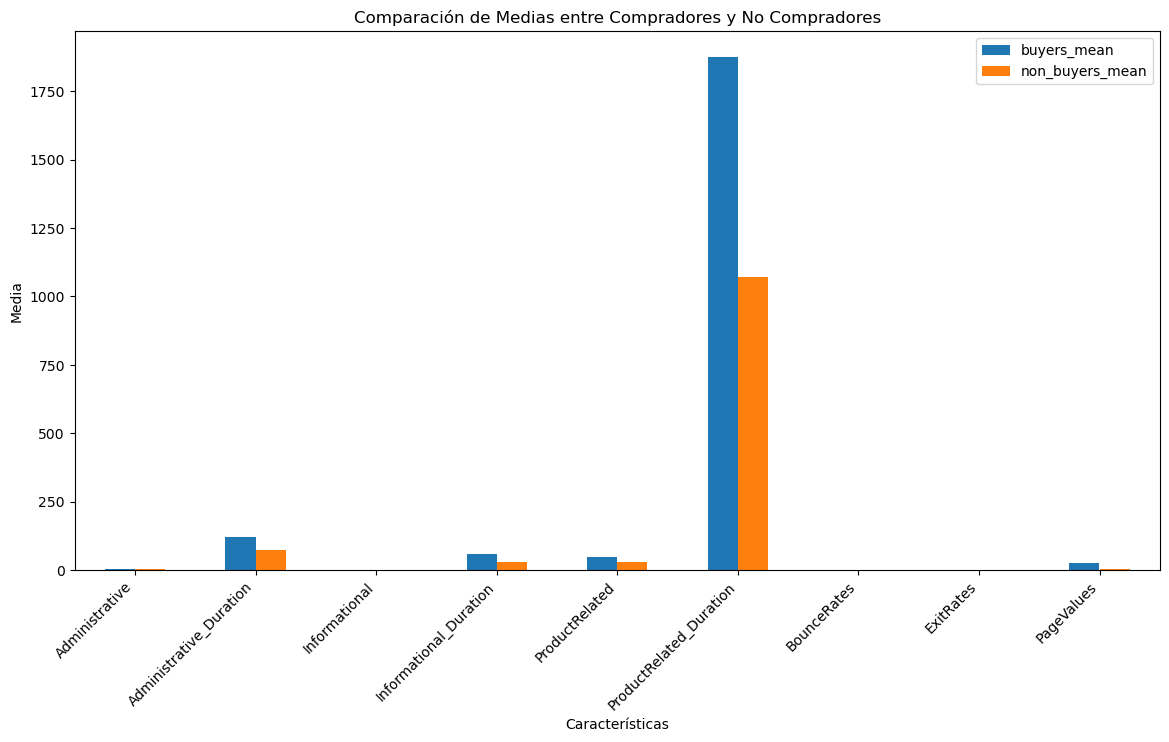

In [24]:
# Análisis de Segmentos
buyers = clientes_new[clientes_new['Revenue'] == 1]
non_buyers = clientes_new[clientes_new['Revenue'] == 0]

# Comparación de estadísticas descriptivas
stats_comparison = pd.DataFrame({
    'buyers_mean': buyers[features].mean(),
    'non_buyers_mean': non_buyers[features].mean(),
    'buyers_std': buyers[features].std(),
    'non_buyers_std': non_buyers[features].std(),
})

print("\nComparación de estadísticas descriptivas entre compradores y no compradores:")
print(stats_comparison)

# Visualización de comparación de medias
stats_comparison[['buyers_mean', 'non_buyers_mean']].plot(kind='bar', figsize=(14, 7))
plt.title('Comparación de Medias entre Compradores y No Compradores')
plt.xlabel('Características')
plt.ylabel('Media')
plt.xticks(rotation=45, ha='right')
plt.show()
